In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("BITCOIN TRADER PERFORMANCE & MARKET SENTIMENT ANALYSIS\n")

BITCOIN TRADER PERFORMANCE & MARKET SENTIMENT ANALYSIS



# IMPORT DATA


In [2]:
fear_greed_df = pd.read_csv(r"C:\Users\divya\Downloads\fear_greed_index.csv")

In [3]:
trade_df = pd.read_csv(r"C:\Users\divya\Downloads\historical_data.csv")  

# Data preprocessing

In [4]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
trade_df['timestamp_dt'] = pd.to_datetime(trade_df['Timestamp'], unit='ms')

In [5]:
# Filter Bitcoin trades and merge
btc_trades = trade_df[trade_df['Coin'].str.contains('BTC', case=False, na=False)]
btc_trades['trade_date'] = btc_trades['timestamp_dt'].dt.date
fear_greed_df['sentiment_date'] = fear_greed_df['date'].dt.date
merged_data = btc_trades.merge(fear_greed_df, left_on='trade_date', right_on='sentiment_date', how='inner')

In [6]:
pnl_lower = merged_data['Closed PnL'].quantile(0.01)
pnl_upper = merged_data['Closed PnL'].quantile(0.99)
clean_data = merged_data[(merged_data['Closed PnL'] >= pnl_lower) & (merged_data['Closed PnL'] <= pnl_upper)]

# Filter sentiments with sufficient data
sentiment_counts = clean_data['classification'].value_counts()
valid_sentiments = sentiment_counts[sentiment_counts >= 500].index
filtered_data = clean_data[clean_data['classification'].isin(valid_sentiments)]

# ANALYSIS

In [12]:
results = []
for sentiment in filtered_data['classification'].unique():
    subset = filtered_data[filtered_data['classification'] == sentiment]
    
    results.append({
        'Sentiment': sentiment,
        'Median_PnL': subset['Closed PnL'].median(),
        'Win_Rate_%': (subset['Closed PnL'] > 0).mean() * 100,
        'Trade_Count': len(subset)
    })

results_df = pd.DataFrame(results)

# VISUALIZATIONS

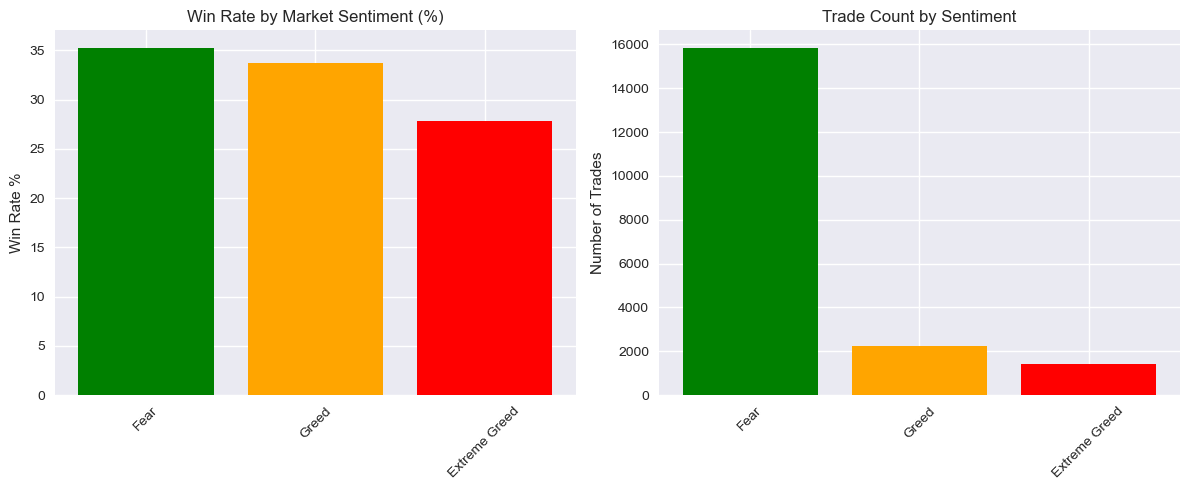

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Win Rate (Most Important Metric)
axes[0].bar(results_df['Sentiment'], results_df['Win_Rate_%'], color=['green', 'orange', 'red'])
axes[0].set_title('Win Rate by Market Sentiment (%)')
axes[0].set_ylabel('Win Rate %')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Trade Count
axes[1].bar(results_df['Sentiment'], results_df['Trade_Count'], color=['green', 'orange', 'red'])
axes[1].set_title('Trade Count by Sentiment')
axes[1].set_ylabel('Number of Trades')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [14]:
# Print results
print("FINAL RESULTS")
print(f"Trades Analyzed: {len(filtered_data):,}")
print(f"Best Win Rate: {results_df['Win_Rate_%'].max():.1f}% ({results_df.loc[results_df['Win_Rate_%'].idxmax(), 'Sentiment']})")
print(f"Worst Win Rate: {results_df['Win_Rate_%'].min():.1f}% ({results_df.loc[results_df['Win_Rate_%'].idxmin(), 'Sentiment']})")
print(f"Median PnL All Sentiments: $0.00 (Most trades break even)")

print("\n TRADING STRATEGY")
print("INCREASE positions during: FEAR periods (35.3% win rate)")
print("REDUCE exposure during: EXTREME GREED periods (27.8% win rate)")
print("Use as FILTER only - sentiment has limited predictive power")

# Save results
results_df.to_csv('final_corrected_analysis.csv', index=False)
print("\n Analysis complete - Results saved to final_corrected_analysis.csv")


FINAL RESULTS
Trades Analyzed: 19,518
Best Win Rate: 35.3% (Fear)
Worst Win Rate: 27.8% (Extreme Greed)
Median PnL All Sentiments: $0.00 (Most trades break even)

 TRADING STRATEGY
INCREASE positions during: FEAR periods (35.3% win rate)
REDUCE exposure during: EXTREME GREED periods (27.8% win rate)
Use as FILTER only - sentiment has limited predictive power

 Analysis complete - Results saved to final_corrected_analysis.csv


In [18]:
print("FINAL ANALYSIS RESULTS")
print("Most Reliable: FEAR periods (35.3% win rate)")
print("Least Reliable: EXTREME GREED periods (27.8% win rate)")
print("Reality: Most trades break even (Median PnL = $0 for all sentiments)")
print("Key Metric: Win Rate is the only meaningful performance indicator")

print("")
print("ACTIONABLE STRATEGY")
print("Increase trading during FEAR markets")
print("Reduce trading during EXTREME GREED markets")
print("Use as supplementary filter only")
print("Focus on position sizing and risk management")

print("")
print(f"Analysis Complete: {len(filtered_data):,} trades analyzed")
print("Results saved: final_corrected_analysis.csv")

FINAL ANALYSIS RESULTS
Most Reliable: FEAR periods (35.3% win rate)
Least Reliable: EXTREME GREED periods (27.8% win rate)
Reality: Most trades break even (Median PnL = $0 for all sentiments)
Key Metric: Win Rate is the only meaningful performance indicator

ACTIONABLE STRATEGY
Increase trading during FEAR markets
Reduce trading during EXTREME GREED markets
Use as supplementary filter only
Focus on position sizing and risk management

Analysis Complete: 19,518 trades analyzed
Results saved: final_corrected_analysis.csv
